# Random Forest

## 1. Exploratory Data Analysis (EDA):


#### Perform exploratory data analysis to understand the structure of the dataset.


In [1]:
#import pandas library
import pandas as pd
import numpy as np

In [2]:
#Load the Excel file
df = pd.read_excel("glass.xlsx", sheet_name="glass")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#Find the shape of the dataset
df.shape

(214, 10)

In [4]:
#Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#Get the dataset summary
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
#check for duplicate rows
df.duplicated().sum()
df[df.duplicated]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
#drop the duplicate rows
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

np.int64(0)

#### Check for missing values, outliers, inconsistencies in the data.

In [8]:
#Check for null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

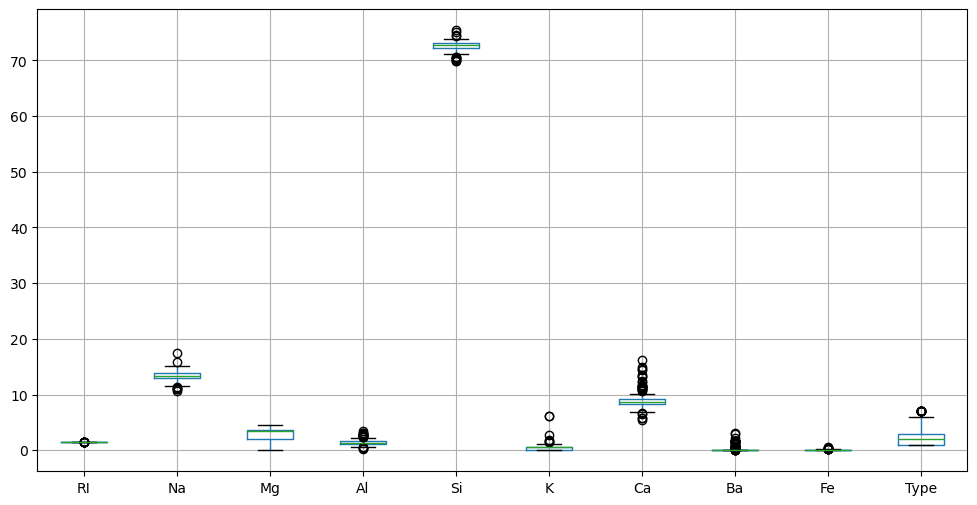

In [10]:
#Check for outliers
plt.figure(figsize=(12, 6))
df.boxplot()

In [11]:
#Outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

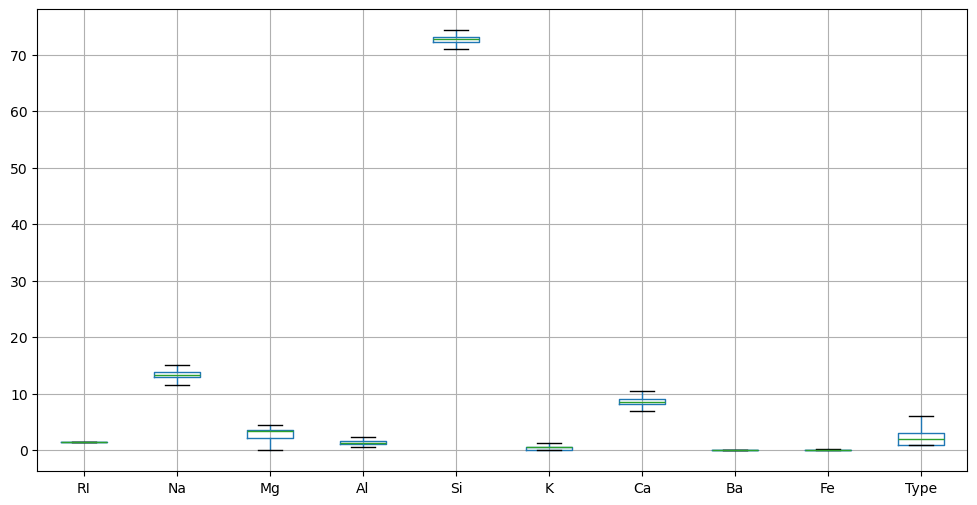

In [12]:
#Check for outliers
plt.figure(figsize=(12, 6))
df.boxplot()

## 2. Data Visualization

#### Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.


In [13]:
# split numerical and categorical data
num_cols = df.select_dtypes(include=['number']).columns
#Select categorical columns
cat_cols = df.select_dtypes(include=['object','bool']).columns

##### Histogram

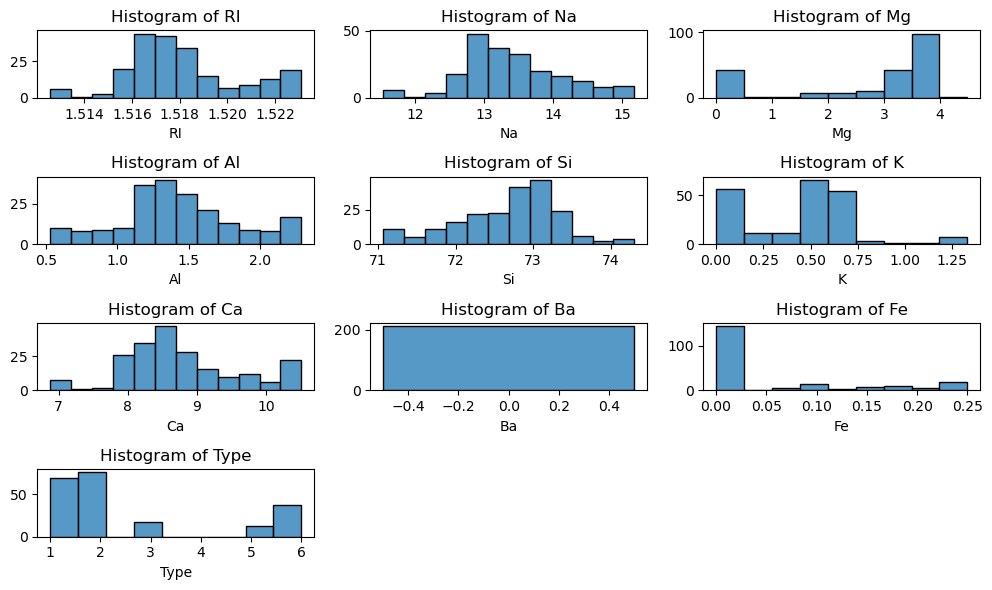

In [14]:
#Histogram
plt.figure(figsize=(10, 6))
num_plots = len(num_cols)
num_rows = (num_plots + 2) // 3 # Adjust rows based on number of plots

#Create histogram for all numerical columns
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Histogram of {col}')
    plt.ylabel('') 

plt.tight_layout()
plt.show()


##### Pair plot

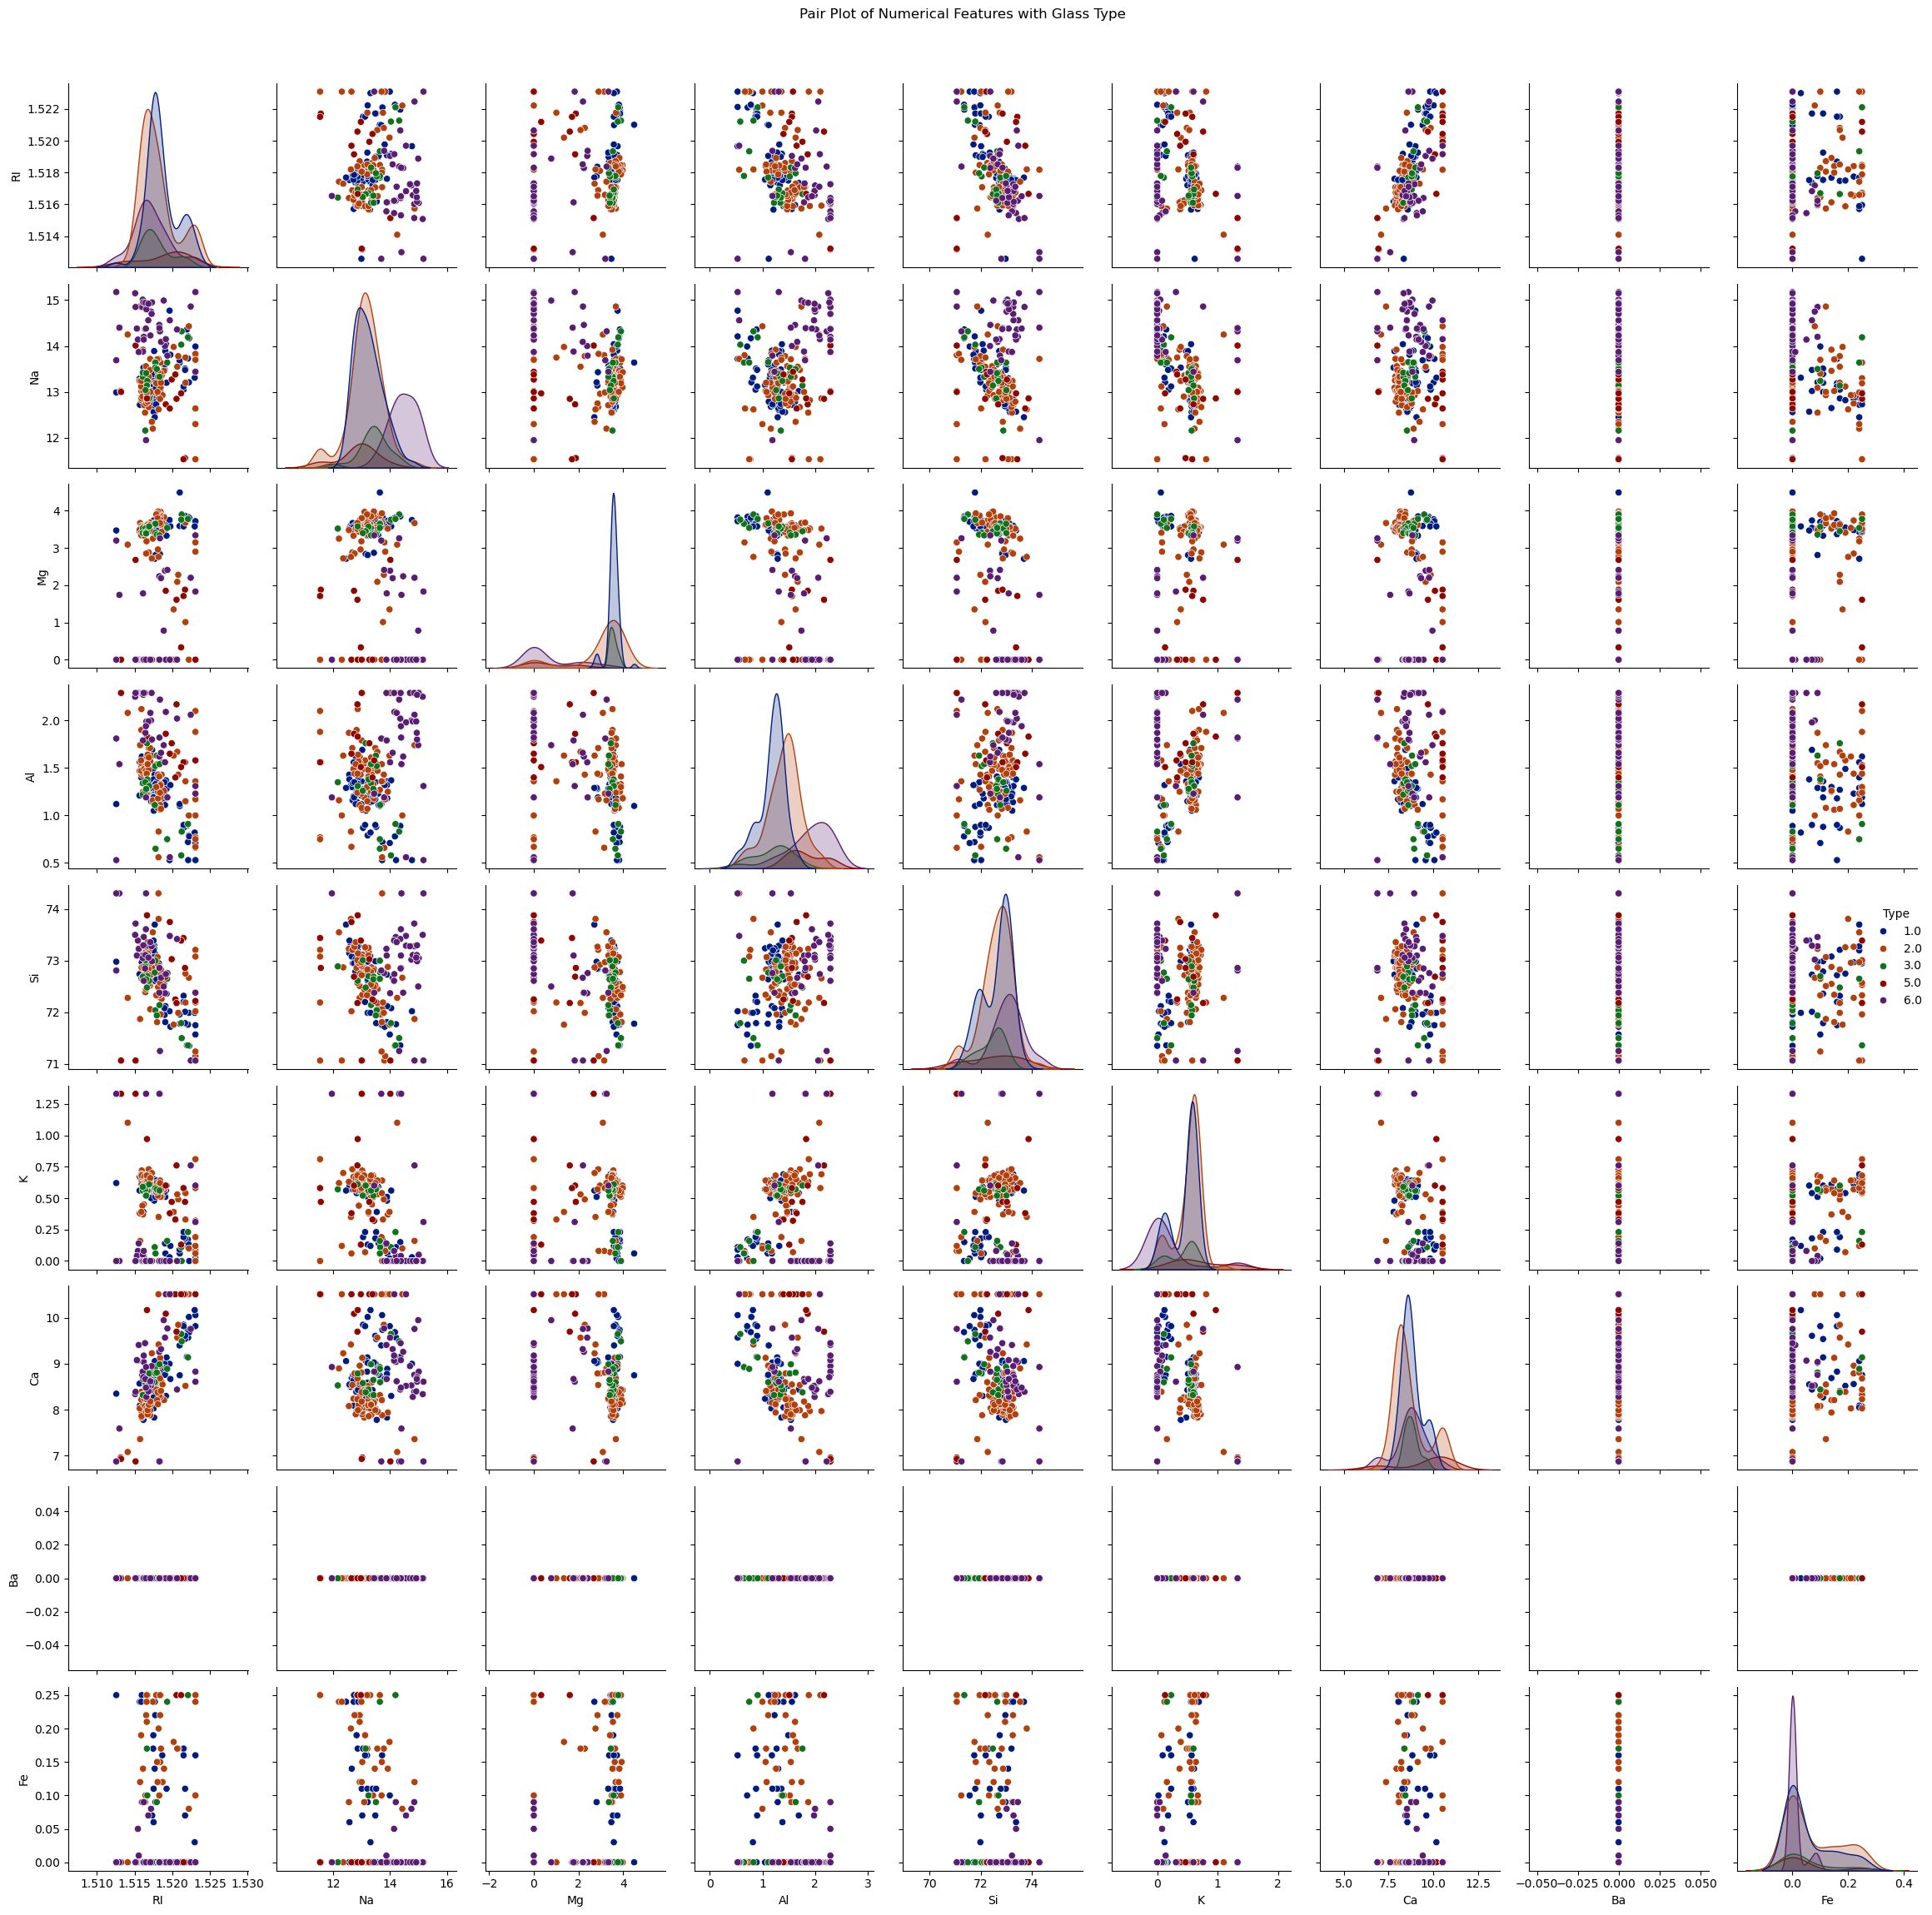

In [15]:
#Pair plot
sns.pairplot(df, diag_kind='kde', hue='Type', palette='dark')
plt.suptitle('Pair Plot of Numerical Features with Glass Type', y=1.02)
plt.tight_layout()
plt.show()

##### Analyze any patterns or correlations observed in the data.

In [16]:
#Correlation of features
corr=df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.072901,-0.038895,-0.461848,-0.526911,-0.339382,0.760626,NaN,0.100217,-0.155095
Na,-0.072901,1.000000,-0.300589,0.223172,-0.158794,-0.492717,-0.103610,NaN,-0.249138,0.503702
Mg,-0.038895,-0.300589,1.000000,-0.472330,-0.206544,0.334363,-0.372089,NaN,0.104381,-0.739870
Al,-0.461848,0.223172,-0.472330,1.000000,0.130631,0.173969,-0.277706,NaN,-0.096567,0.585616
Si,-0.526911,-0.158794,-0.206544,0.130631,1.000000,-0.040748,-0.188686,NaN,-0.068593,0.166276
K,-0.339382,-0.492717,0.334363,0.173969,-0.040748,1.000000,-0.497856,NaN,0.076522,-0.243427
Ca,0.760626,-0.103610,-0.372089,-0.277706,-0.188686,-0.497856,1.000000,NaN,0.106853,0.073455
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.100217,-0.249138,0.104381,-0.096567,-0.068593,0.076522,0.106853,NaN,1.000000,-0.219217
Type,-0.155095,0.503702,-0.739870,0.585616,0.166276,-0.243427,0.073455,NaN,-0.219217,1.000000


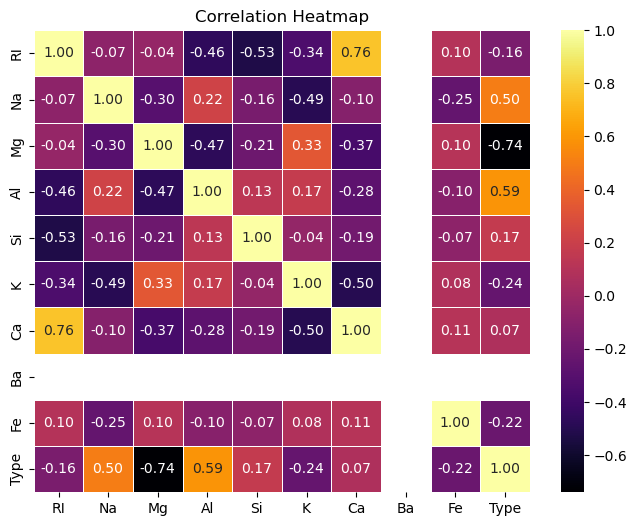

In [17]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Analysis

**Strong Correlations**
- RI (Refractive Index) & Ca (Calcium) - 0.76 (strong positive) Higher calcium content is strongly associated with higher refractive index.

- Mg (Magnesium) & Type - -0.74 (strong negative) Certain glass types are strongly negatively correlated with magnesium content.

- Al (Aluminum) & Type - 0.59 (moderate positive) Glass type tends to increase with aluminum content.

- Na (Sodium) & Type - 0.50 (moderate positive) Sodium content is positively correlated with glass type classification.

**Moderate Correlations**
- RI & Si (Silicon) - -0.53 (moderate negative) Higher silicon content reduces refractive index.

- RI & Al (Aluminum) - -0.46 (moderate negative) Aluminum content lowers refractive index.

- K (Potassium) & Na (Sodium) - -0.49 (moderate negative) Sodium and potassium are inversely related.

- Mg & Al - -0.47 (moderate negative) Magnesium and aluminum tend to move in opposite directions.

**Weak or Negligible Correlations**
- Fe (Iron) shows weak correlations with most variables (all < |0.25|).

- Ba (Barium) has missing values (NaN), so no correlation can be inferred.

- Type & Si - 0.17 (weak positive), not very meaningful.

**Observed Patterns**
- Refractive Index (RI) is most influenced by Ca (positive) and Si/Al (negative). - Suggests calcium increases density/optical properties, while silicon/aluminum reduce them.

- Glass Type classification is strongly tied to Mg (negative) and Al/Na (positive). - Different glass types are chemically distinguished by these oxides.

- Elemental trade-offs:

  Sodium vs Potassium (inverse relationship).

  Magnesium vs Aluminum (inverse relationship). These may reflect substitution effects in glass composition.

## 3. Data Preprocessing

#### 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

In [18]:
#Checking for missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

##### Explanation:
There is no missing values found,hence imputation or removal is not required.

#### 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

In [19]:
#Check for categorical column
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

##### Explanation:
There is all numerical columns and there is no any categorical column ,hence no need to apply any encoding techniques to covert them to numerical.

#### 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [20]:
#import standardization
from sklearn.preprocessing import StandardScaler
#import SMOTE to handle imbalnced data
from imblearn.over_sampling import SMOTE

In [21]:
# Split features and target variable 
target = df['Type']
features = df.drop(columns=['Type'])

# apply standardization
scaler = StandardScaler()
features_sca = scaler.fit_transform(features)

# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
features_bal, target_bal = smote.fit_resample(features_sca, target)

# Check the data distribution after balancing
print("Class distribution after resampling:")
print(pd.Series(target_bal).value_counts())

Class distribution after resampling:
Type
1.0    76
2.0    76
3.0    76
5.0    76
6.0    76
Name: count, dtype: int64


### 4. Random Forest Model Implementation


#### 1. Divide the data into train and test split.

In [22]:
# Import the train_test_split function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [23]:
#Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 9)
(43, 9)
(170,)
(43,)


#### 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.


In [24]:
#import random forest libraries
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Initialize a RandomForestClassifier
RF_model = RandomForestClassifier(random_state=42)
RF_model

RandomForestClassifier(random_state=42)

#### 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [26]:
#import performance matrics libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [27]:
# Train the Random Forest model
RF_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = RF_model.predict(x_test)

# Evaluate the model's performance
print("\nEvaluating Random Forest Model performance")
print("------------------------------------------")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")


Evaluating Random Forest Model performance
------------------------------------------
Accuracy: 0.8605
Precision: 0.8893
Recall: 0.8605
F1-Score: 0.8621


## 5.Bagging and Boosting Methods


#### Apply the Bagging and Boosting methods and compare the results.

In [28]:
#import BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

##### Bagging Method

In [29]:
#  Bagging Method
print("Bagging Method")
print("-------------------------------")
# 1. Initialize BaggingClassifier
bagging_model = BaggingClassifier(random_state=42)

# 2. Train the Bagging model
bagging_model.fit(x_train, y_train)

# 3. Make predictions
y_pred_bagging = bagging_model.predict(x_test)

# 4. Evaluate Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted', zero_division=0)
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted', zero_division=0)
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted', zero_division=0)

print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print(f"Bagging Precision: {precision_bagging:.4f}")
print(f"Bagging Recall: {recall_bagging:.4f}")
print(f"Bagging F1-Score: {f1_bagging:.4f}")

Bagging Method
-------------------------------
Bagging Accuracy: 0.7674
Bagging Precision: 0.7872
Bagging Recall: 0.7674
Bagging F1-Score: 0.7642


##### Boosting

In [30]:
GradientBoostingClassifier
# Gradient Boosting Method
print("Gradient Boosting Method")
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model
gradient_boosting_model.fit(x_train, y_train)

# Make predictions
y_pred_gradient_boosting = gradient_boosting_model.predict(x_test)

# Evaluate Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gradient_boosting)
precision_gb = precision_score(y_test, y_pred_gradient_boosting, average='weighted', zero_division=0)
recall_gb = recall_score(y_test, y_pred_gradient_boosting, average='weighted', zero_division=0)
f1_gb = f1_score(y_test, y_pred_gradient_boosting, average='weighted', zero_division=0)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting Precision: {precision_gb:.4f}")
print(f"Gradient Boosting Recall: {recall_gb:.4f}")
print(f"Gradient Boosting F1-Score: {f1_gb:.4f}")

Gradient Boosting Method
Gradient Boosting Accuracy: 0.7209
Gradient Boosting Precision: 0.7899
Gradient Boosting Recall: 0.7209
Gradient Boosting F1-Score: 0.7229


##### Model Performance Comparison

In [31]:
Model_comp = {
            "Model": ['Random_Forest','Bagging','Gradiant_Boosting'],
            "Accuracy": [accuracy_rf,accuracy_bagging,accuracy_gb],
            "Precision": [precision_rf,precision_bagging,precision_gb],
            "Recall": [recall_rf,recall_bagging,recall_gb],
            "F1": [f1_rf,f1_bagging,f1_gb]
}
#Create DataFrame
ModelComp=pd.DataFrame(Model_comp)

#Display only 4 decimal values
pd.set_option("display.precision", 4)
ModelComp


,Model,Accuracy,Precision,Recall,F1
0,Random_Forest,0.8605,0.8893,0.8605,0.8621
1,Bagging,0.7674,0.7872,0.7674,0.7642
2,Gradiant_Boosting,0.7209,0.7899,0.7209,0.7229


### Conclusion:
The **Random Forest Model** demonstrated good performance compared to the **Bagging** and **Gradient Boosting** models based on the evaluated metrics. It achieved the highest accuracy, precision, recall, and F1-score, suggesting that the **Random Forest model is the most suitable choice for the glass classification task.**

## Additional Notes:


#### 1. Explain Bagging and Boosting methods. How is it different from each other.


##### **Bagging (Bootstrap Aggregating)**
- Creates multiple subsets of the training data using bootstrap sampling (random sampling with replacement).

- Trains base learners (often decision trees) independently on each subset.

- Combines predictions: majority vote for classification, average for regression.

- Goal: Reduce variance and prevent overfitting.

- Example: Random Forest is a classic Bagging method.

- Key Point: Models are trained in parallel and do not depend on each other.


**Boosting**
- Trains models sequentially. Each new model focuses on the errors made by the previous one.

- Assigns higher weights to misclassified samples so later learners pay more attention to them.

- Combines weak learners into a strong learner.

- Goal: Reduce bias and improve accuracy.

- Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM.

- Key Point: Models are trained adaptively and sequentially, each correcting the predecessor.

#### 2. Explain how to handle imbalance in the data.

##### **1.Resampling Methods**
Oversampling minority class:
    Duplicate or synthetically generate more samples of minority classes.
    Example: SMOTE (Synthetic Minority Oversampling Technique) creates synthetic samples by interpolating between existing minority samples.

Undersampling majority class:
    Reduce the number of majority samples to balance the dataset.
    Risk: may lose useful information.

##### **2.Algorithmic Approaches**
Class weights
    Assign higher weights to minority classes during training.

In scikit learn:
    python
    RandomForestClassifier(class_weight='balanced')
    Cost-sensitive learning
    Penalize misclassification of minority classes more heavily.

##### **3. Data-Level Approaches**
Collect more data for minority classes (if possible).
Data augmentation (for images/text) to artificially expand minority samples.

##### **4. Evaluation Metrics**
Accuracy alone is misleading. Use:Precision, Recall, F1-score (especially per class).
Confusion Matrix to see misclassifications.
ROC-AUC / PR-AUC for better insight into minority class performance.